<a href="https://colab.research.google.com/github/onmyeoin/tensorflow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### introduction to NN classification with tensorflow

A classification is when you try to classify something as one thing or another

A few types of classification:
* Binary classification
* Multiclass classification
* Multilabel classification

In [37]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_circles

# Create Circles

X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42)


In [38]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [39]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [40]:
# Data is hard to understand, lets visualise with a DataFrame
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


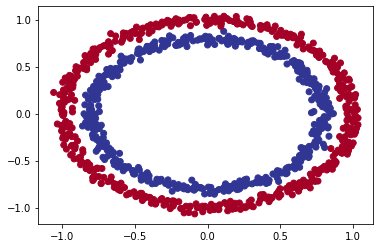

In [41]:
# visualise with plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [42]:
## Input & output shapes of NN

X.shape, y.shape

((1000, 2), (1000,))

In [43]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [44]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create or import model
2. compile model
3. fit model
4. evaluate model
5. tweak and repeat

In [45]:
# set random seed

tf.random.set_seed(42)

# Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])


# Fit Model

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 3.3908 - accuracy: 0.4680
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7733 - accuracy: 0.4900
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7139 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4890


In [46]:
# Improve model by adding another layer and trainging for longer 

tf.random.set_seed(42)


# Create model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit Model

model_2.fit(X, y, epochs=100, verbose=0)

In [47]:
# Evaluate Model

model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5000


[0.6949286460876465, 0.5]

## accuracy is still only 50% -> only as good as guessing!

## Need to improve further

In [48]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit 

model_3.fit(X, y, epochs=100, verbose=0)

In [49]:
# evaluate model

model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5050


[0.6998058557510376, 0.5049999952316284]

### Lets Visualise the results to get an idea of why our models predictions are so poor

In [50]:
import numpy as np

In [51]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
     


313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


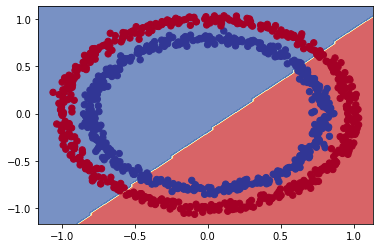

In [52]:
# Lets look at the predicitons

plot_decision_boundary(model_3, X, y)

### Non Linearity Pt1

In [53]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3870 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3653 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2992 - accuracy: 0.4690
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2401 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2305 - accuracy: 0.4690
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2236 - accuracy: 0.4690
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1658 - accuracy: 0.4670
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1211 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1001 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0931 - accuracy: 0.4700
Epoch 11/

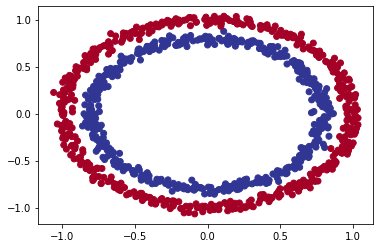

In [54]:
# Visualise data

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


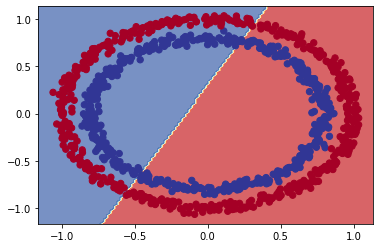

In [55]:
# Check the decision boundry 

plot_decision_boundary(model=model_4,X=X,y=y)

### Lets try build a non linear activation function 

In [56]:
# Set random seed
tf.random.set_seed(42)

# Build Model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0679 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0540 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9786 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9713 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9577 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9255 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8978 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8820 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8780 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8753 - accuracy: 0.4870
Epoch 11/

### time to replicate multi layer NN 

In [57]:
# set random seed
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2347 - accuracy: 0.4410
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5983 - accuracy: 0.4650
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1175 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0926 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9839 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9559 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9330 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9136 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8963 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.4750
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


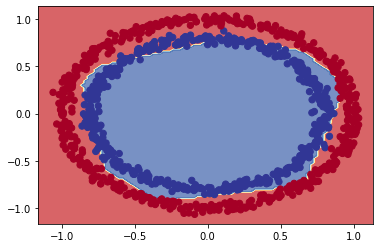

In [58]:
plot_decision_boundary(model=model_6, X=X, y=y)

### introducing a sigmoid activation function to the output layer

In [59]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit model
history = model_7.fit(X, y, epochs=250, verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


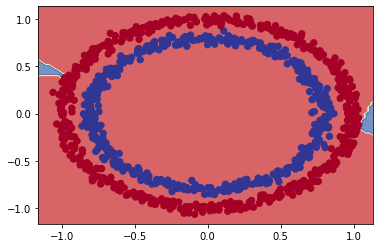

In [60]:
plot_decision_boundary(model=model_7, X=X, y=y)

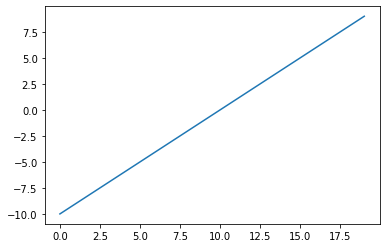

In [61]:
# Create a toy tensor to pass into model

A = tf.cast(tf.range(-10,10), tf.float32)

plt.plot(A)

### Evaluating and improving our classification

So fr weve been training and testing on the same data Set

In ML this is basicially a sin

In [62]:
# Check how many examples we have 

len(X)

1000

In [63]:
# split into train and test by indexing

x_train, y_train = X[:800],y[:800]

x_test, y_test = X[800:], y[800:]

x_train.shape,x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

### Lets recreate a model to fit on the training data and evaluate on the test data

In [64]:
# Set rendom seed
tf.random.set_seed(42)

# Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4812
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5075
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5238
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5587
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5738
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.5562
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6025
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6150
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6612
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7013
Epoch 11/25
25/25 [

In [65]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.9150


[0.26289793848991394, 0.9150000214576721]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


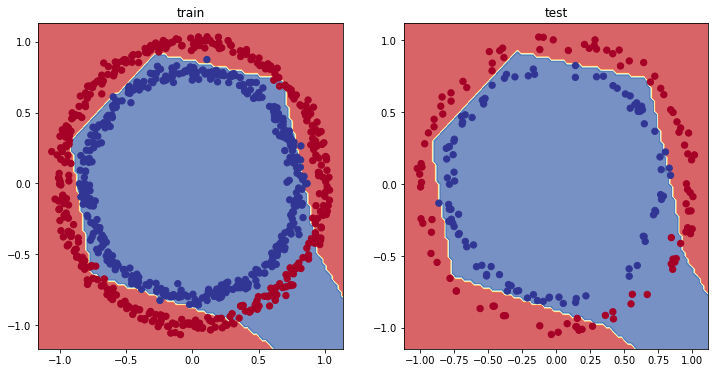

In [66]:
# plot decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_8,X=x_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_8,X=x_test, y=y_test)
plt.show();

### plot the training (or loss) curves

In [67]:
# convert history object into data from
pd.DataFrame(history.history)


,loss,accuracy
0,0.693361,0.48125
1,0.691550,0.50750
2,0.688355,0.52375
3,0.684350,0.55875
4,0.677161,0.57375
5,0.669534,0.55625
6,0.661060,0.60250
7,0.643754,0.61500
8,0.622891,0.66125
9,0.602586,0.70125


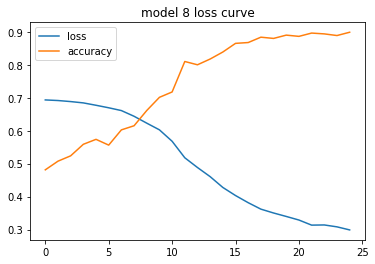

In [68]:
# plot the curves
pd.DataFrame(history.history).plot()
plt.title("model 8 loss curve");

# for many problems the loss functuion going down means the model is improving 


### Using loss curves to find the ideal learning rate

* to find the ideal learning rate we are going to do the following:

1. learning rate callback - adds functionality while the model is training
2. another model
3. a modified loss curve plot


In [70]:
# set random seed
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile model

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Create learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit model (passing lr scheduler callback)

history = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 0.6975 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<AxesSubplot:>

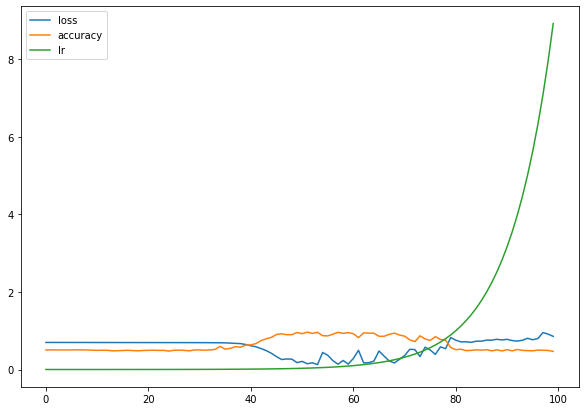

In [71]:
# checkout histroy

pd.DataFrame(history.history).plot(figsize=(10, 7))

In [72]:
# plot the learning rate vs the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [73]:
len(lrs)

100

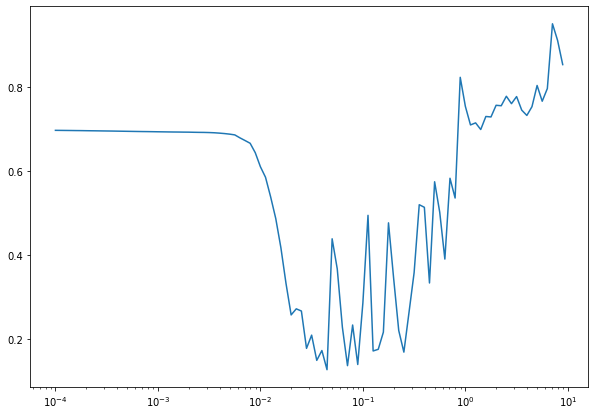

In [74]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])

### Classification evaluation metrics

1. Accuracy -> not good for imbalanced classes
2. Precision -> less false positives (fp)
3. Recall -> less false negatives (fn)

** Cant have precision and recall as they are the invese of each other

4. f1-score -> good overall metric (combination of percision and recall)
5. Confusion matrix 


#### Working with a larger example (multiclass classification)

* when you have more than 2 classes it is multi class classification



### To practice, we are going to build a NN we are going to classify images of clothing


In [76]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been split into training and testing for us
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [78]:
# to look at example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [79]:
# Check the shape of a single example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

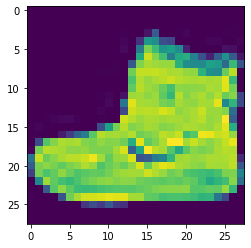

In [80]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [81]:
# Create a small list so we can index onto training labels so they are human readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt","Sneaker","Bag","Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Bag')

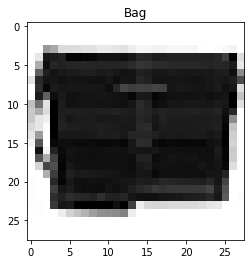

In [84]:
# Plot an example image and its label
index_of_choice = 1991
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

### Lets look at random images in the dataset


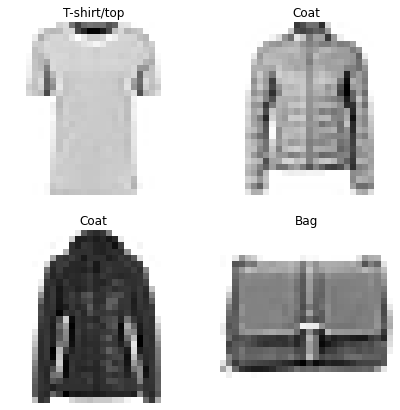

In [87]:
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a multiclass classification model

Important!!

* input shape (shape of one image) - 28x28
* output shape (one per class of clothing) - 10
* loss function - categorical cross entropy
* output layer activation - Softmax (not sigmoid)



In [93]:
# set random seed
tf.random.set_seed(42)

# Create model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  # Our data needs to be flattened 
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2377 - accuracy: 0.1651 - val_loss: 2.0029 - val_accuracy: 0.2047
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9481 - accuracy: 0.2303 - val_loss: 1.8812 - val_accuracy: 0.2484
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6925 - accuracy: 0.3057 - val_loss: 1.5594 - val_accuracy: 0.3226
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5160 - accuracy: 0.3359 - val_loss: 1.5078 - val_accuracy: 0.3279
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4664 - accuracy: 0.3502 - val_loss: 1.4530 - val_accuracy: 0.3599
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4214 - accuracy: 0.3843 - val_loss: 1.4449 - val_accuracy: 0.3456
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3789 - accuracy: 0.3979 - val_loss: 1.3763 - val_accuracy:

In [95]:
# Check the model summary

model_11.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 4)                 3140      
                                                                 
 dense_50 (Dense)            (None, 4)                 20        
                                                                 
 dense_51 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Check the min and max of the training data

train_data.min(), train_data.max()

(0, 255)

In [97]:
# We can get our training and testing data between 0 and 1 by dividing by the max number

train_data_norm = train_data / train_data.max()
test_data_norm = test_data / train_data.max()



In [98]:
# check values of scaled data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [99]:
# Now that the data is scaled, lets see how much the performance has improved

# set random seed
tf.random.set_seed(42)

# Create model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  # Our data needs to be flattened 
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model

norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1092 - accuracy: 0.5779 - val_loss: 0.6835 - val_accuracy: 0.7559
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6339 - accuracy: 0.7678 - val_loss: 0.6296 - val_accuracy: 0.7740
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6009 - accuracy: 0.7818 - val_loss: 0.6332 - val_accuracy: 0.7712
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5840 - accuracy: 0.7893 - val_loss: 0.6049 - val_accuracy: 0.7857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5747 - accuracy: 0.7912 - val_loss: 0.6054 - val_accuracy: 0.7864
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5665 - accuracy: 0.7960 - val_loss: 0.5953 - val_accuracy: 0.7900
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5591 - accuracy: 0.7999 - val_loss: 0.6399 - val_accuracy:

In [ ]:
### Need to scale/normalize the data!! big improvement